<a href="https://colab.research.google.com/github/nityamshah/datascience/blob/main/PersonalProjectsAndPractice/s%26p500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal is to create a model that determines whether the S&P 500 will go up or down tomorrow. Data is being pulled from yahoo finance with the yfinance library. Referenced https://github.com/dataquestio/project-walkthroughs/tree/master/sp_500 for base code

# Gather and Clean Data


In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period = "max")
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500 = sp500.loc["1990-01-01":].copy() #dates that are too early may not be useful to the model if the market has fundamentally changed
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000
...,...,...,...,...,...
2025-08-05 00:00:00-04:00,6336.629883,6346.000000,6289.370117,6299.189941,5517410000
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000


<Axes: xlabel='Date'>

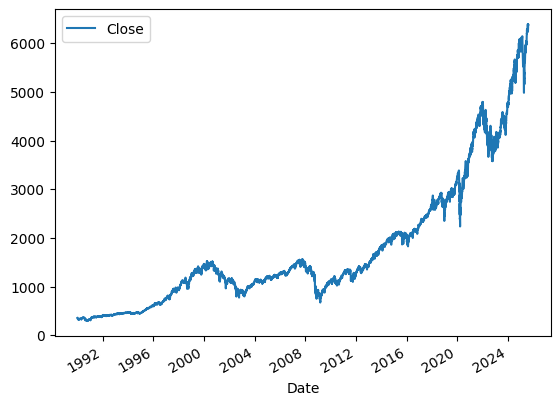

In [ ]:
sp500.plot.line(y="Close", use_index=True)

In [ ]:
#goal/target is to predict if next day's price will be higher or lower

sp500["Tomorrow"] = sp500["Close"].shift(-1) #adding a column that reflects the next days price historically
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int) #returns boolean telling us if tommorow is greater than today
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-08-05 00:00:00-04:00,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,6345.060059,1
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1


# Model 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100] #all the rows except the last hundred for training
test = sp500.iloc[-100:] #last hundred rows in test

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
#accuracy - what percentage of the time when we said the market would go up did it actually go up?

from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
precision_score(test["Target"], preds)

0.6

<Axes: xlabel='Date'>

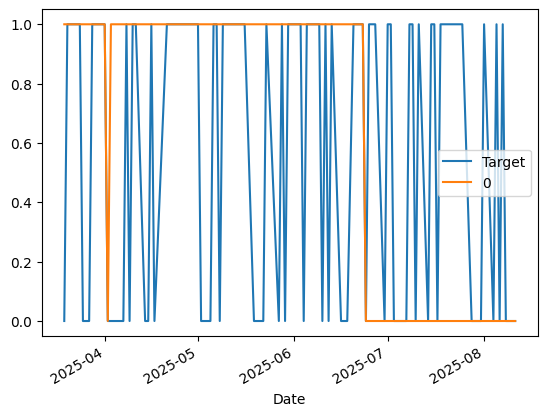

In [ ]:
#plot predictions vs actual
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

# Building a More Robust Backtesting System

In [ ]:
#a function for everything in Model 1

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
#about 250 days in a trading year
#this function trains a model on 10 years of data and predict the 11th year. Then take the first 11 years of data and predict the 12th year. Continue on until end of dataset.
#this mimics real trading because you retrain periodically and ensures we never train on future data - no leakage

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5296324081020255

# Adding more predictors

In [ ]:
#adding close ratio and trend predictors over different horizons (past 2 days, past 5 days, past 60 days, etc)

horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-04 00:00:00-04:00,6271.709961,6330.689941,6271.709961,6329.939941,4842580000,6299.189941,0,1.007315,1.0,1.000272,1.0,1.039001,36.0,1.083618,144.0,1.322288,531.0
2025-08-05 00:00:00-04:00,6336.629883,6346.000000,6289.370117,6299.189941,5517410000,6345.060059,1,0.997565,1.0,0.997672,1.0,1.032160,35.0,1.077533,144.0,1.315353,530.0
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0,1.003628,1.0,1.005506,2.0,1.037735,36.0,1.084560,144.0,1.324405,530.0


# Model 2

In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
#update predict method to predict the probability that the stock will go up the next day, not just whether or not it will. then add a 60% probability threshold for the model to return a 1.

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5712643678160919

# Predicting the Next Day

In [ ]:
# Train on *all available data* (no future leakage — we stop at the most recent day)
train = sp500.copy()

# Fit the model
model.fit(train[new_predictors], train["Target"])

# Get the latest row of features (most recent day in your data)
last_row = train.iloc[[-1]][new_predictors]

# Predict probability for "tomorrow"
proba_up = model.predict_proba(last_row)[0][1]
pred_class = int(proba_up >= 0.6)  # Using your 60% threshold

print(f"Probability S&P 500 will go up tomorrow: {proba_up:.2%}")
print(f"Prediction (1=up, 0=down): {pred_class}")

Probability S&P 500 will go up tomorrow: 45.95%
Prediction (1=up, 0=down): 0


# Next Steps

Model sits at a .57 precision score so work can still be done to improve it.

- Add in indices that open earlier in the day
- News/Articles
- General macroeconomic conditions like interest rates, inflation
- Track key components of the s&p 500 like tech
- Increase resolution (look at hourly instead of daily)
- other features:

Lagged returns: Not just yesterday’s, but returns from the last 2, 3, 5, and 10 days.

Moving averages: e.g., 5-day, 10-day, 20-day SMA and EMA.

Volatility measures: Rolling standard deviation over 5, 10, 20 days.

Momentum indicators: RSI, MACD, stochastic oscillator.

Volume-based features: Volume changes, On-Balance Volume.

Sector or market breadth indicators: Number of S&P 500 stocks above 50-day MA.

Macro/other markets: Bond yields, VIX, oil prices, etc. (but careful with look-ahead bias).

